In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
# データの読み込み
# INPUT_DIRにtrain.csvなどのデータを置いているディレクトリを指定してください。
INPUT_DIR = "../data/input/"

df = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")

In [4]:
# カラムを取得
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60

In [7]:
df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                    34241
FLAG_OWN_REALTY                 34241
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   163
NAME_TYPE_SUITE                   747
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    112992
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [8]:
df['DAYS_EMPLOYED'].describe()

count    171202.000000
mean      63960.411969
std      141401.513149
min      -17912.000000
25%       -2772.000000
50%       -1215.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [12]:
def replace_anomalies(df):
    df["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)
    return df


In [27]:
replace_anomalies(df)
replace_anomalies(test)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,171202,Cash loans,F,N,N,1,144000.0,961146.0,28233.0,688500.0,...,NaN,2.0,0.0,2.0,0.0,-1.0,NaN,NaN,NaN,NaN
1,171203,Cash loans,F,N,N,0,103500.0,296280.0,16069.5,225000.0,...,NaN,5.0,0.0,5.0,0.0,-212.0,NaN,NaN,NaN,NaN
2,171204,Cash loans,F,N,Y,1,180000.0,183694.5,11236.5,139500.0,...,0.389339,7.0,0.0,7.0,0.0,-428.0,0.0,1.0,1.0,1.0
3,171205,Revolving loans,F,N,Y,2,225000.0,450000.0,22500.0,450000.0,...,0.217629,2.0,0.0,2.0,0.0,-442.0,0.0,0.0,0.0,3.0
4,171206,Cash loans,F,Y,Y,2,144000.0,545040.0,26640.0,450000.0,...,NaN,2.0,0.0,2.0,0.0,-1333.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61495,232697,Cash loans,F,Y,Y,0,315000.0,1288350.0,37800.0,1125000.0,...,0.307737,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0
61496,232698,Cash loans,F,NaN,NaN,0,90000.0,273636.0,15408.0,247500.0,...,0.434733,0.0,0.0,0.0,0.0,-2732.0,0.0,0.0,0.0,0.0
61497,232699,Cash loans,F,N,Y,0,144000.0,291384.0,26725.5,270000.0,...,NaN,0.0,0.0,0.0,0.0,-615.0,0.0,0.0,1.0,0.0
61498,232700,Cash loans,F,N,Y,1,193500.0,746280.0,59094.0,675000.0,...,NaN,2.0,0.0,2.0,0.0,-1610.0,0.0,0.0,1.0,3.0


<Axes: xlabel='TARGET', ylabel='DAYS_EMPLOYED'>

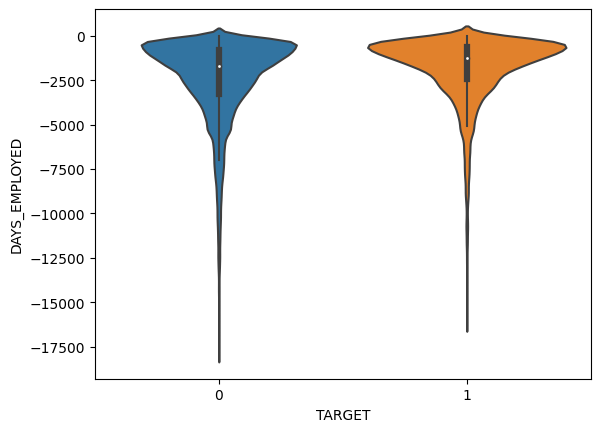

In [24]:
# データの前処理
# DAYS_EMPLOYEDを可視化
sns.violinplot(x='TARGET', y='DAYS_EMPLOYED', data=df)

<Axes: ylabel='DAYS_EMPLOYED'>

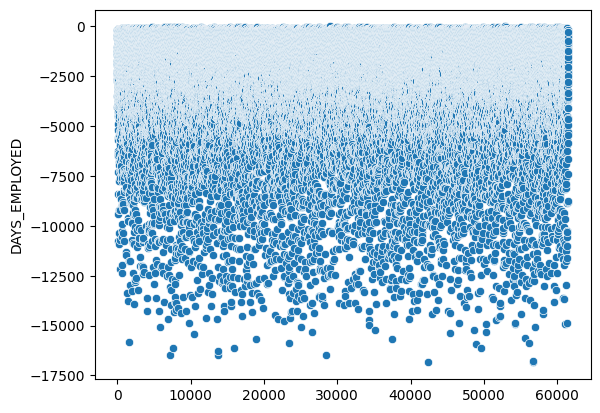

In [28]:
sns.scatterplot(test['DAYS_EMPLOYED'])

In [11]:
def clean(df: pd.DataFrame) -> pd.DataFrame:
    # DAYS_EMPLOYED anomalies
    df["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)

    # Encode binary categorical features
    for col in ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]:
            df[col] = df[col].map({"Y": 1, "N": 0}).astype(float)
    return df

df = clean(df)

In [19]:
df['FLAG_OWN_CAR'].unique()[2]is np.nan

True

In [16]:
df['FLAG_OWN_REALTY']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
171197   NaN
171198   NaN
171199   NaN
171200   NaN
171201   NaN
Name: FLAG_OWN_REALTY, Length: 171202, dtype: float64

In [41]:
# Encode binary categorical features
for col in ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]:
    for df_ in [df, test]:
        df_[col] = df_[col].map({"Y": 1, "N": 0}).astype(float)